In [1]:
!pip install japanize_matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(font="IPAexGothic",style="white")
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

     |████████████████████████████████| 4.1 MB 4.9 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=3333b3532514a29f3829b2e96b119b92b558cba6b882bd02be7a77457a2cc879
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [2]:
# データの読み込み
df_train_master=pd.read_csv('/content/drive/MyDrive/data/finance2_train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/data/finance2_test.csv')
df_submit=pd.read_csv('/content/drive/MyDrive/data/finance2_submit.csv')
df_answer=pd.read_csv('/content/drive/MyDrive/data/finance2_answer.csv')
df_train=df_train_master.copy()
df_train

,Date,High,Low,Open,Close
0,2003-01-23,100.416900,99.950797,100.314203,100.235198
1,2003-01-24,100.930402,100.172002,100.251001,100.717098
2,2003-01-27,101.862602,100.717098,100.796097,101.467602
3,2003-01-28,101.688801,101.135803,101.483405,101.491301
4,2003-01-29,101.609796,101.033100,101.483405,101.341199
...,...,...,...,...,...
2182,2011-07-07,92.264890,90.571922,92.174042,92.193787
2183,2011-07-10,90.644598,88.792047,90.489759,90.492917
2184,2011-07-11,89.125431,86.571360,89.072500,89.074079
2185,2011-07-12,88.502120,87.532002,87.532002,87.530417


In [3]:
#データの確認
display(df_train.describe().T)
display(df_test.describe().T)

,count,mean,std,min,25%,50%,75%,max
High,2187.0,108.734330,12.233109,84.473121,101.661148,107.226697,116.785701,134.251806
Low,2187.0,107.610347,12.299644,83.287332,100.460351,106.286595,116.031250,133.604796
Open,2187.0,108.203299,12.259910,83.858501,101.119997,106.839604,116.363049,133.868656
Close,2187.0,108.204905,12.271763,83.856133,101.143699,106.823801,116.402551,133.944502


,count,mean,std,min,25%,50%,75%,max
High,1314.0,98.975436,9.542734,76.054883,94.195055,101.439159,105.625167,118.108954
Low,1314.0,98.190527,9.561047,74.994700,93.259893,100.675230,104.833196,117.149095
Open,1314.0,98.601504,9.547183,75.256981,93.721649,101.005450,105.288237,117.196505
Close,1314.0,98.601355,9.547930,75.253033,93.714540,101.024408,105.281326,117.228100


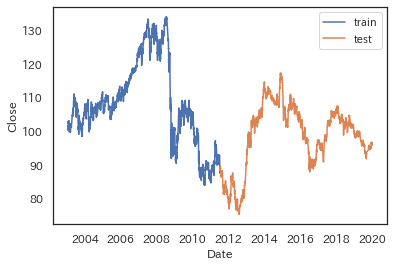

In [4]:
#データの可視化
df_train["Date"]=pd.to_datetime(df_train["Date"])
sns.lineplot(data=df_train,x="Date",y="Close",label="train");
df_test["Date"]=pd.to_datetime(df_test["Date"])
sns.lineplot(data=df_test,x="Date",y="Close",palette="red",label="test");

In [5]:
#特徴量作成(trainデータ)
df_train['Body'] = df_train['Open']-df_train['Close']
df_train["Close_diff"]=df_train["Close"].diff(1)
df_train["Close_1"]=df_train["Close_diff"].shift(1)
df_train["Close_2"]=df_train["Close_diff"].shift(2)
df_train["Close_3"]=df_train["Close_diff"].shift(3)
df_train["Close_4"]=df_train["Close_diff"].shift(4)
df_train["Close_2w"]=df_train["Close_diff"].shift(10)
df_train["Close_4w"]=df_train["Close_diff"].shift(20)
df_train["Close_6w"]=df_train["Close_diff"].shift(30)
df_train["Close_trend"]=(df_train["Close_diff"]+df_train["Close_2w"]+df_train["Close_4w"]+df_train["Close_6w"])/4
df_train["Close_next"]=df_train["Close_diff"].shift(-1)
df_train=df_train.dropna()
df_train["Month"]=df_train["Date"].dt.strftime("%m").astype(int)
df_train=df_train[["Date","Close","Body","Close_diff","Close_1","Close_2","Close_3","Close_4","Close_trend","Close_next","Month"]]
df_train["diff_5average"]=np.mean(df_train[["Close_diff","Close_1","Close_2","Close_3","Close_4"]],1)
df_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Close,Body,Close_diff,Close_1,Close_2,Close_3,Close_4,Close_trend,Close_next,Month,diff_5average
31,2003-03-07,101.838903,-0.150102,0.165905,0.071097,0.015803,0.315995,0.450300,0.183677,0.118495,3,0.203820
32,2003-03-10,101.957398,-0.150102,0.118495,0.165905,0.071097,0.015803,0.315995,0.110600,0.150102,3,0.137459
33,2003-03-11,102.107500,-0.165905,0.150102,0.118495,0.165905,0.071097,0.015803,-0.203425,-0.150102,3,0.104281
34,2003-03-12,101.957398,0.110600,-0.150102,0.150102,0.118495,0.165905,0.071097,-0.063201,-0.750498,3,0.071100
35,2003-03-13,101.206900,0.750498,-0.750498,-0.150102,0.150102,0.118495,0.165905,0.045427,-0.884802,3,-0.093219
...,...,...,...,...,...,...,...,...,...,...,...,...
2181,2011-07-06,91.632098,0.015803,-0.750504,-0.417909,-0.095586,0.584598,-0.015803,-0.485850,0.561689,7,-0.139041
2182,2011-07-07,92.193787,-0.019745,0.561689,-0.750504,-0.417909,-0.095586,0.584598,-0.078606,-1.700870,7,-0.023542
2183,2011-07-10,90.492917,-0.003158,-1.700870,0.561689,-0.750504,-0.417909,-0.095586,-0.710802,-1.418838,7,-0.480636
2184,2011-07-11,89.074079,-0.001579,-1.418838,-1.700870,0.561689,-0.750504,-0.417909,0.119291,-1.543662,7,-0.745286


In [6]:
#特徴量作成(testデータ)
#Body作成
df_test['Body'] = df_test['Open']-df_test['Close']
#trainデータから過去データを追加
c1=df_train_master.copy()
c1["Body"]=c1['Open']-c1['Close']
c1["Use"]=np.tile([1,1,1,0,0,0,0,1,1,1], 219)[:2187]
c1=c1.query("Use==1")
c1=c1[["Date","Close","Body"]]
c2=df_test[["Date","Close","Body"]]
c1["Date"]=pd.to_datetime(c1["Date"])
df_test2=pd.concat([c1,c2],ignore_index=True)
#特徴量作成
df_test2["Close_diff"]=df_test2["Close"].diff(1)
df_test2["Close_1"]=df_test2["Close_diff"].shift(1)
df_test2["Close_2"]=df_test2["Close_diff"].shift(2)
df_test2["Close_3"]=df_test2["Close_diff"].shift(3)
df_test2["Close_4"]=df_test2["Close_diff"].shift(4)
df_test2["Close_2w"]=df_test2["Close_diff"].shift(10)
df_test2["Close_4w"]=df_test2["Close_diff"].shift(20)
df_test2["Close_6w"]=df_test2["Close_diff"].shift(30)
df_test2["Close_trend"]=(df_test2["Close_diff"]+df_test2["Close_2w"]+df_test2["Close_4w"]+df_test2["Close_6w"])/4
df_test2=df_test2.dropna()
df_test2["Month"]=df_test2["Date"].dt.strftime("%m").astype(int)
df_test2=df_test2[["Date","Close","Body","Close_diff","Close_1","Close_2","Close_3","Close_4","Close_trend","Month"]]
df_test2["diff_5average"]=np.mean(df_test2[["Close_diff","Close_1","Close_2","Close_3","Close_4"]],1)
df_test2=df_test2.iloc[1275:,]
df_test2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,Close,Body,Close_diff,Close_1,Close_2,Close_3,Close_4,Close_trend,Month,diff_5average
1306,2011-07-03,92.896097,0.025284,0.584598,1.619496,-0.214876,-0.210929,0.327055,0.379397,7,0.421069
1307,2011-07-04,92.800511,0.008691,-0.095586,0.584598,1.619496,-0.214876,-0.210929,0.104676,7,0.336541
1308,2011-07-05,92.382602,0.015008,-0.417909,-0.095586,0.584598,1.619496,-0.214876,-0.390064,7,0.295145
1309,2011-07-06,91.632098,0.015803,-0.750504,-0.417909,-0.095586,0.584598,1.619496,-0.307506,7,0.188019
1310,2011-07-07,92.193787,-0.019745,0.561689,-0.750504,-0.417909,-0.095586,0.584598,0.185055,7,-0.023542
...,...,...,...,...,...,...,...,...,...,...,...
2620,2019-12-25,95.771703,0.000000,-0.056089,-0.580650,0.270182,-0.544312,1.215811,0.164715,12,0.060988
2621,2019-12-26,95.860182,-0.000790,0.088480,-0.056089,-0.580650,0.270182,-0.544312,-0.025872,12,-0.164478
2622,2019-12-27,96.127200,0.027647,0.267018,0.088480,-0.056089,-0.580650,0.270182,0.110007,12,-0.002212
2623,2019-12-30,96.693633,0.003158,0.566432,0.267018,0.088480,-0.056089,-0.580650,-0.004543,12,0.057038


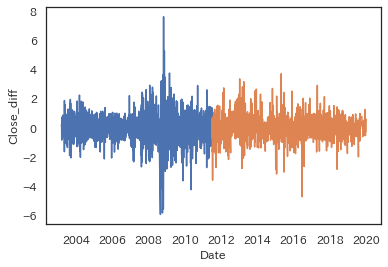

In [7]:
#Close_diffのグラフ
sns.lineplot(data=df_train,x="Date",y="Close_diff");
sns.lineplot(data=df_test2,x="Date",y="Close_diff");

In [8]:
#学習データ、検証データ、テストデータの作成
X=df_train.drop(["Close_next","Date"],1)
y=df_train["Close_next"]
X_test=df_test2.drop("Date",1)
# 学習データと検証データに80:20の割合で2分割する
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X, y, test_size=0.20, shuffle=False)
X_train

,Close,Body,Close_diff,Close_1,Close_2,Close_3,Close_4,Close_trend,Month,diff_5average
31,101.838903,-0.150102,0.165905,0.071097,0.015803,0.315995,0.450300,0.183677,3,0.203820
32,101.957398,-0.150102,0.118495,0.165905,0.071097,0.015803,0.315995,0.110600,3,0.137459
33,102.107500,-0.165905,0.150102,0.118495,0.165905,0.071097,0.015803,-0.203425,3,0.104281
34,101.957398,0.110600,-0.150102,0.150102,0.118495,0.165905,0.071097,-0.063201,3,0.071100
35,101.206900,0.750498,-0.750498,-0.150102,0.150102,0.118495,0.165905,0.045427,3,-0.093219
...,...,...,...,...,...,...,...,...,...,...
1750,106.255000,0.237002,-0.240944,1.109949,-1.303507,0.166689,1.342214,-0.129953,11,0.214880
1751,106.428801,-0.262281,0.173801,-0.240944,1.109949,-1.303507,0.166689,-0.398752,11,-0.018803
1752,105.939005,0.458189,-0.489796,0.173801,-0.240944,1.109949,-1.303507,0.481111,11,-0.150100
1753,105.559796,0.387104,-0.379209,-0.489796,0.173801,-0.240944,1.109949,-0.623507,11,0.034760


Training until validation scores don't improve for 20 rounds.
[10]	training's rmse: 0.896755	valid_1's rmse: 0.873208
[20]	training's rmse: 0.896741	valid_1's rmse: 0.873207
[30]	training's rmse: 0.896727	valid_1's rmse: 0.873206
[40]	training's rmse: 0.896714	valid_1's rmse: 0.873205
[50]	training's rmse: 0.8967	valid_1's rmse: 0.873204
[60]	training's rmse: 0.896686	valid_1's rmse: 0.873203
[70]	training's rmse: 0.896673	valid_1's rmse: 0.873203
[80]	training's rmse: 0.896659	valid_1's rmse: 0.873202
[90]	training's rmse: 0.896645	valid_1's rmse: 0.873201
[100]	training's rmse: 0.896632	valid_1's rmse: 0.8732
[110]	training's rmse: 0.896618	valid_1's rmse: 0.873199
[120]	training's rmse: 0.896604	valid_1's rmse: 0.873199
[130]	training's rmse: 0.896591	valid_1's rmse: 0.873198
[140]	training's rmse: 0.896577	valid_1's rmse: 0.873197
[150]	training's rmse: 0.896563	valid_1's rmse: 0.873196
[160]	training's rmse: 0.89655	valid_1's rmse: 0.873196
[170]	training's rmse: 0.896536	valid_1'

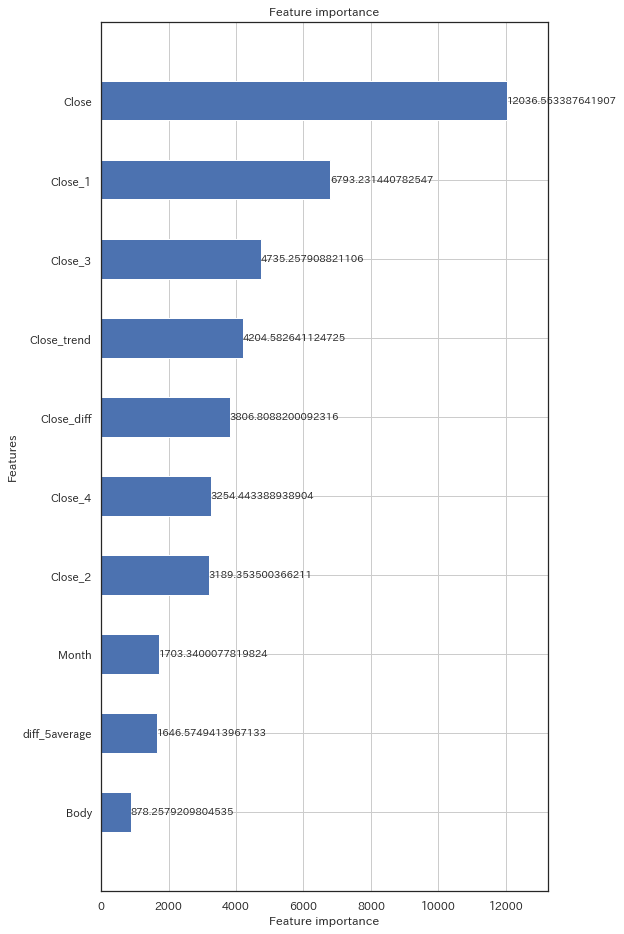

In [76]:
#lightGBM
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
params={"objective":"regression","metrics":"rmse","boosting_type": "gbdt","num_leaves": 31,"learning_rate":0.00001,"min_data_in_leaf":20}
model=lgb.train(params,lgb_train,valid_sets=[lgb_train,lgb_eval],num_boost_round=200,early_stopping_rounds=20,verbose_eval=10)
y_pred = model.predict(X_val, num_iteration=model.best_iteration)
print("RMSE=",np.sqrt(mean_squared_error(y_val,y_pred)))
lgb.plot_importance(model, importance_type="gain", height=0.5, figsize=(8,16))
print(model.params)

In [10]:
#NULLモデルのスコア
y_pred=X_val["Close_diff"]
print("RMSE=",np.sqrt(mean_squared_error(y_val,y_pred)))

RMSE= 1.2557334571050507


In [77]:
#submitデータ作成
#lightGBM
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
df_test2["Close_next"]=df_test2["Close"]+y_pred
df_test3=df_test2.iloc[5:,:]
df_submit["Close"]=df_test3["Close_next"][5::6].values
df_submit

,Date,Close
0,2011-07-24,89.486800
1,2011-08-07,88.073495
2,2011-08-21,86.693363
3,2011-09-04,86.595403
4,2011-09-18,84.054760
...,...,...
214,2019-11-06,95.551564
215,2019-11-20,95.039647
216,2019-12-04,95.398303
217,2019-12-18,96.411088


In [78]:
#最終スコア
y_pred=df_submit["Close"]
y_test=df_answer["Close"]
print("RMSE=",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE= 0.6382183675605932


In [54]:
#NULLモデルのスコア
y_pred=df_test["Close"][5::6]
print("RMSE=",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE= 0.6381123026127834
